**Importing libraries**

In [1]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

path of any image containig graph can be used

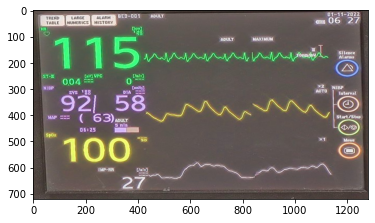

In [2]:
path = '/kaggle/input/cldphy-data/Classification Dataset-20230121T163510Z-001/Classification Dataset/Nihon-Kohden-lifescope-A/charaklucknow_icu_mon--1_2022_11_1_4_15_1.jpeg'
image = Image.open(path)
image = np.array(image)
plt.imshow(image)

need to provide the coordinates of the region containing graph

In [3]:
cor = [423, 144, 1123, 210]

**Preprocessing on graph image using OpenCV**

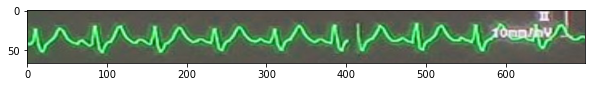

In [10]:
crop = image[cor[1]:cor[3],cor[0]:cor[2]]
plt.figure(figsize=(10,1))
plt.imshow(crop)

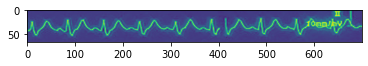

In [11]:
gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

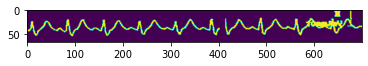

In [12]:
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

In [13]:
b  = np.zeros(crop.shape)

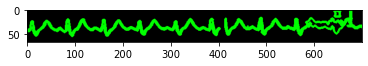

In [14]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(b,contours, -1, (0, 255, 0), 3)
plt.imshow(b)

Here,the graph is disconnected so we can take only graph of maximum length.

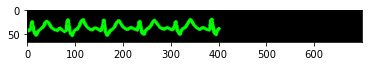

In [15]:
max_contour = max(contours, key=lambda x: cv2.arcLength(x, True))
n = np.zeros(crop.shape)
cv2.drawContours(n,max_contour, -1, (0, 255, 0), 3)
plt.imshow(n)

In [19]:
def graph(crop):

        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

        ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

        contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

        max_contour = max(contours, key=lambda x: cv2.arcLength(x, True))

        epsilon = 0.0001 * cv2.arcLength(max_contour, True)
        approx = cv2.approxPolyDP(max_contour, epsilon, True)   

        app = np.reshape(approx, (1,approx.shape[0],2))
        result = [(x, y) for sublist in app for x, y in sublist]

        x_y_dict = {}

        for x, y in result:
            if x not in x_y_dict:
                x_y_dict[x] = [y]
            else:
                x_y_dict[x].append(y)

        new_points = []

        for x, y_values in x_y_dict.items():
            avg_y = sum(y_values)/len(y_values)
            new_points.append((x, avg_y))
        new_points = sorted(new_points, key = lambda p: p[0])

        from scipy.interpolate import interp1d
        x = [x  for x, y in new_points]
        y = [100-y for x, y in new_points]
        x = np.array(x)
        y = np.array(y)
    
        sub = (np.floor(x[0]/100))*100
        for idx,i in enumerate(x):
            i = i - sub
            x[idx] = i

        cubic_interpolation_model = interp1d(x, y, kind = "cubic")
        X_=np.linspace(x.min(), x.max(), 170)
        Y_=cubic_interpolation_model(X_)
        
        plt.figure(figsize=(10,1))
        plt.plot(X_,Y_)
        plt.xlim(min(X_),max(X_))
        plt.ylim(min(Y_), max(Y_))
        plt.grid(True)
        plt.show()    
   

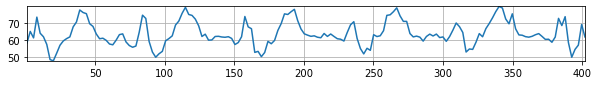

In [20]:
graph(crop)

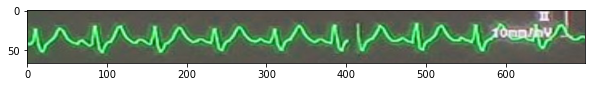

In [21]:
plt.figure(figsize=(10,1))
plt.imshow(crop)